# MNIST Dataset with `sklearn`

In [13]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

C:\Users\fongc\AppData\Local\Temp\ipykernel_752\2358979565.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


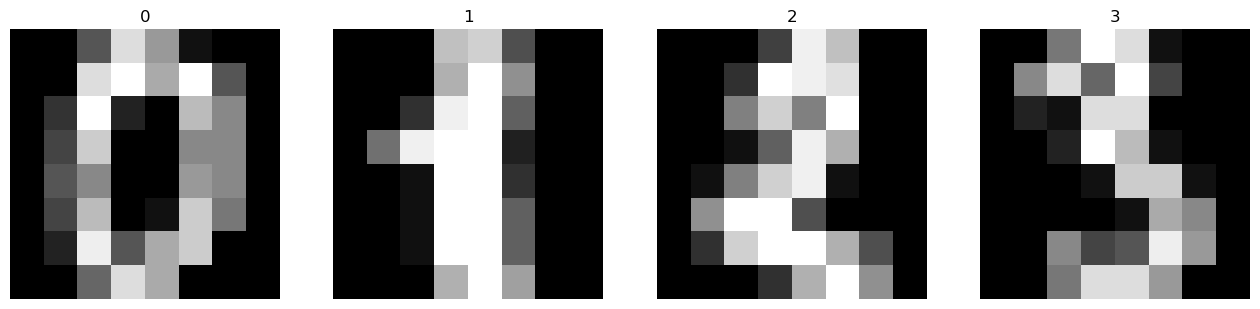

In [9]:
# MNIST dataset
digits = datasets.load_digits()

fig, axes = plt.subplots(1, 4, figsize = (16, 4))
for a, img, label in zip(axes, digits.images, digits.target):
    # plot images in subplot
    a.imshow(img, cmap = "gray")
    a.set_title(label)
    a.axis("off")
fig.show()

In [10]:
# flatten images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.2, shuffle = False)

In [11]:
# create SVM classifier
classifier = svm.SVC(gamma = 0.001)

# train the model
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

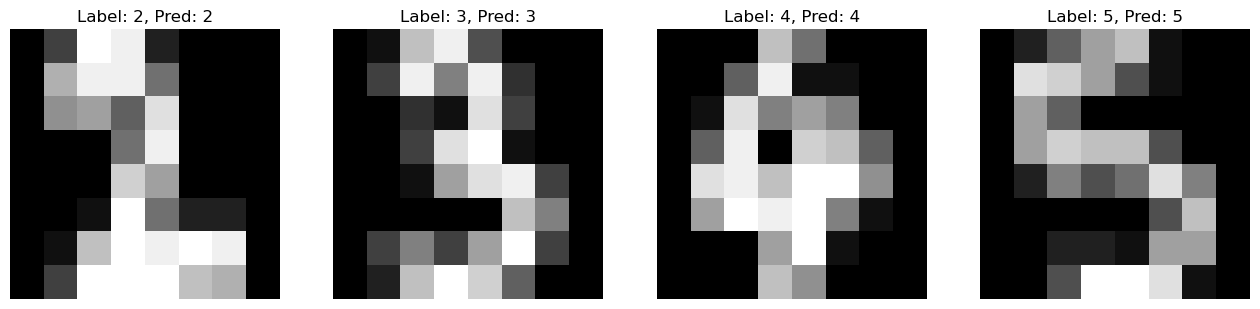

In [16]:
# make predictions
predicted = classifier.predict(X_test)

# plot predictions
fig, axes = plt.subplots(1, 4, figsize = (16, 4))
for a, img, label, pred in zip(axes, X_test, y_test, predicted):
    # plot images in subplot
    a.imshow(img.reshape(8, 8), cmap = "gray")
    a.set_title(f"Label: {label}, Pred: {pred}")
    a.axis("off")

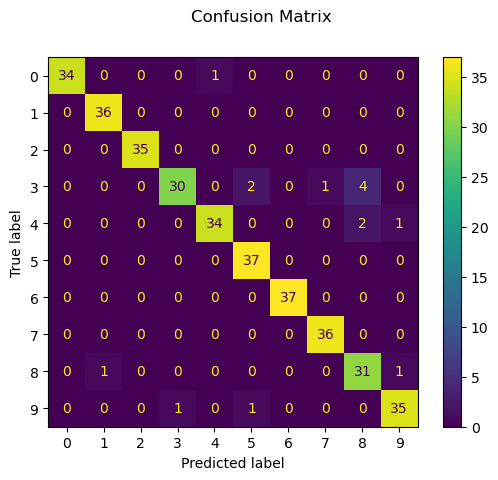

In [18]:
# confusion matrix
matrix = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
matrix.figure_.suptitle("Confusion Matrix")
plt.show()